## Missingno: Visualizing Missing Data Patterns

---
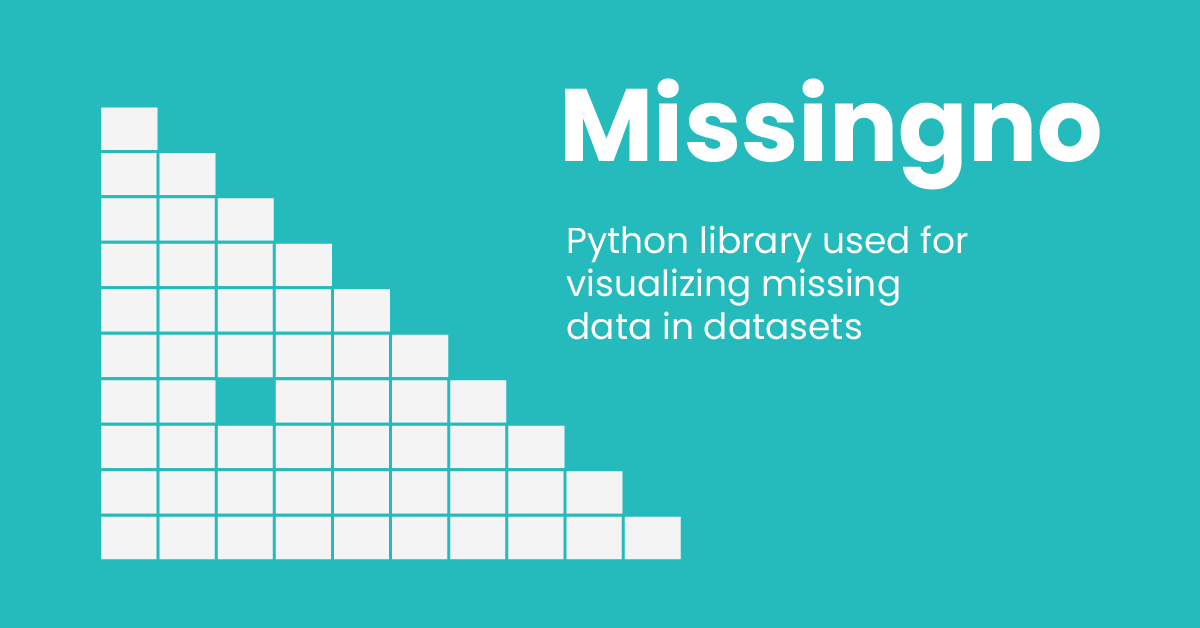

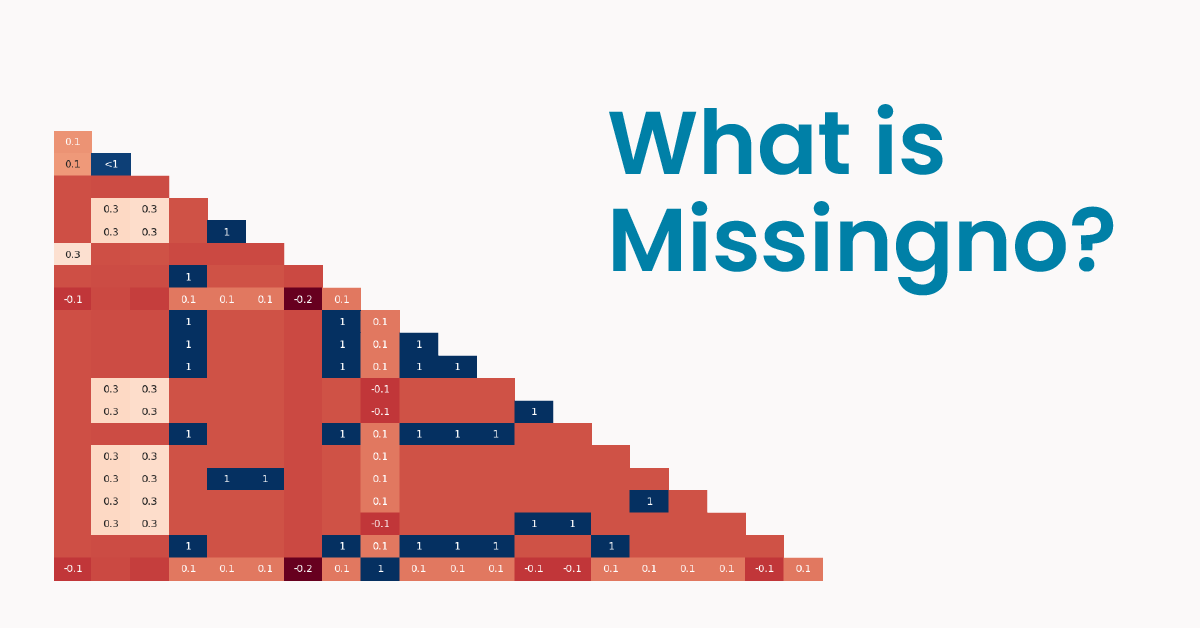

---

Missingno is a specialized library for understanding the distribution and correlation of missing values within a dataset. 
In Data Science, understanding **why** data is missing is as important as the data itself.

### Installation

In [ ]:
%%capture
# !pip install missingno

In [28]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import os

## 📥 Loading the Data

In [ ]:
# Loading the local dataset
df = pd.read_csv('./Data/Titanic-Dataset.csv')

# Traditional check for missing values
print("Data Shape", df.shape)
print("Summary of Missing Values (Standard Pandas):")
print(df.isnull().sum())

Summary of Missing Values (Standard Pandas):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 1. Matrix Plot
The `matrix` plot provides a visual summary of data completion. 
- The **white horizontal lines** represent missing cells.
- The **sparkline** on the right shows the general completeness of each row.

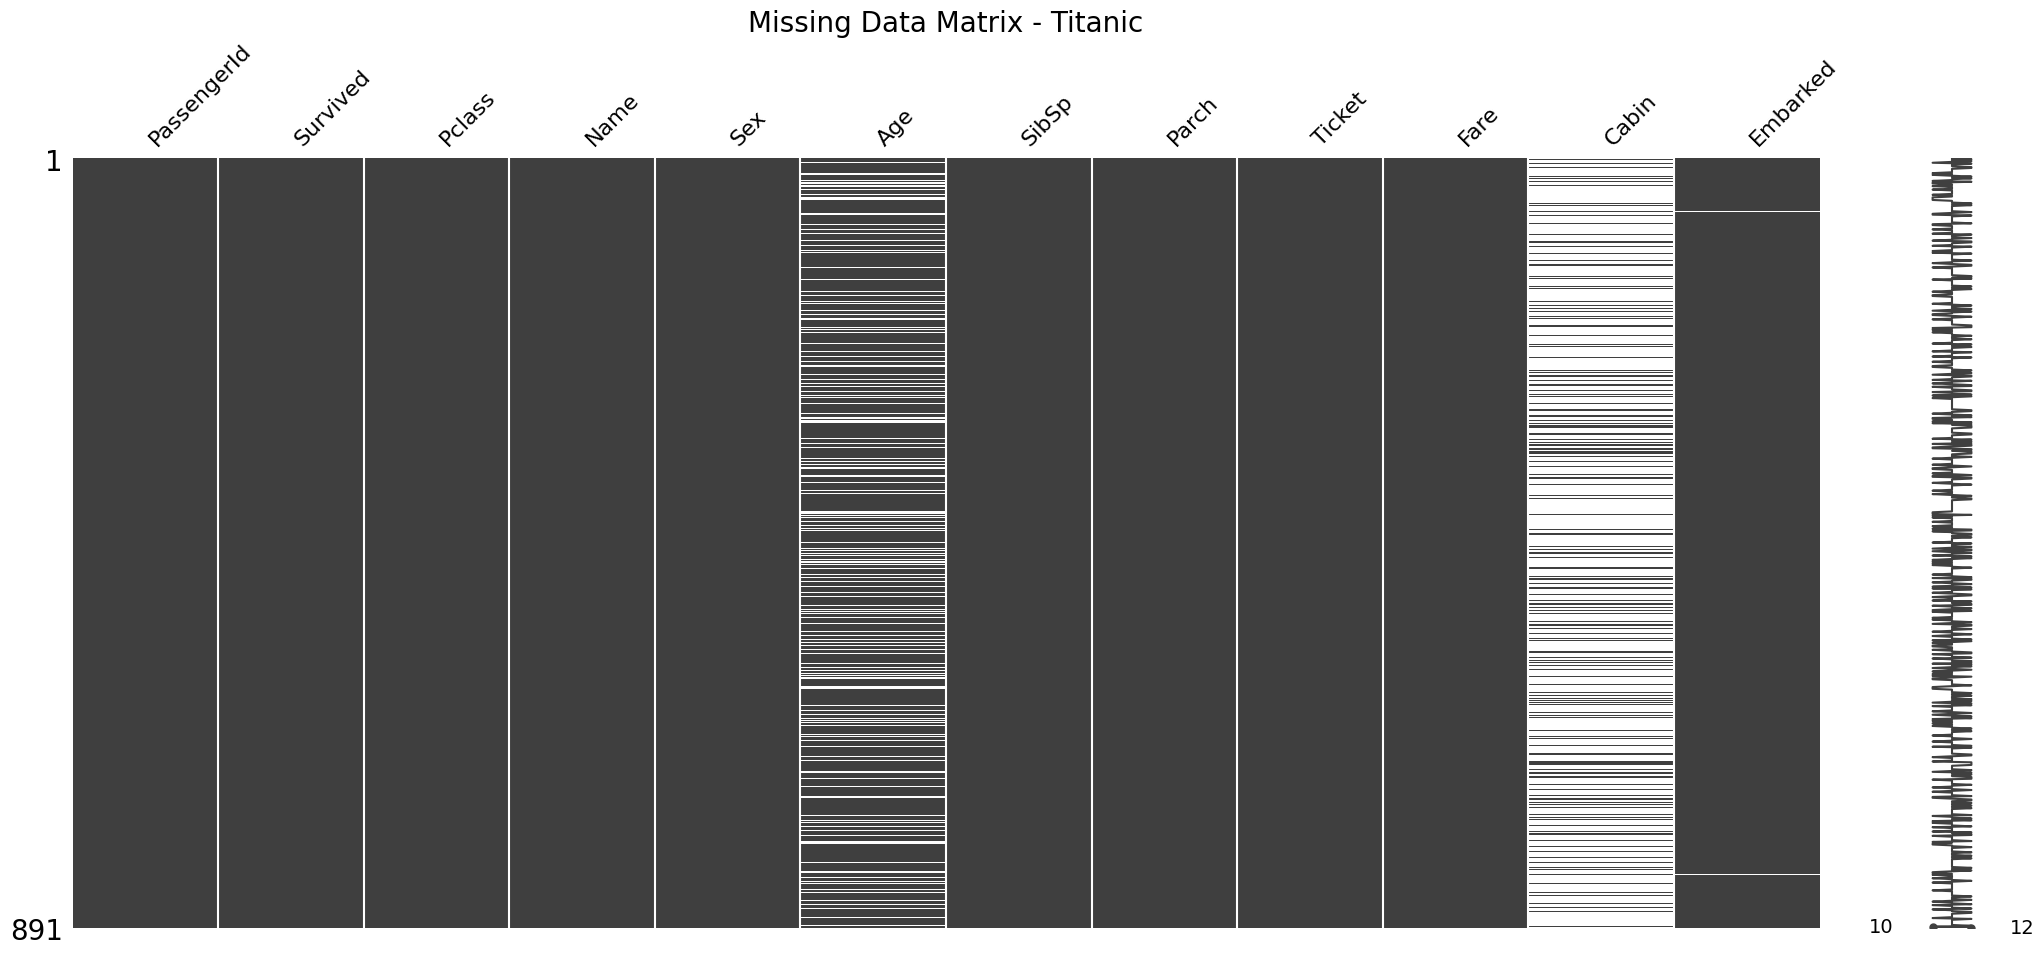

In [30]:
msno.matrix(df)
plt.title("Missing Data Matrix - Titanic", fontsize=20)
plt.show()

### 2. Bar Chart and Nullity Correlation
- **Bar Chart:** Shows the total count of existing (non-null) values per column.
- **Heatmap:** Measures **Nullity Correlation**: it shows how strongly the presence or absence of one variable 
  affects the presence of another.

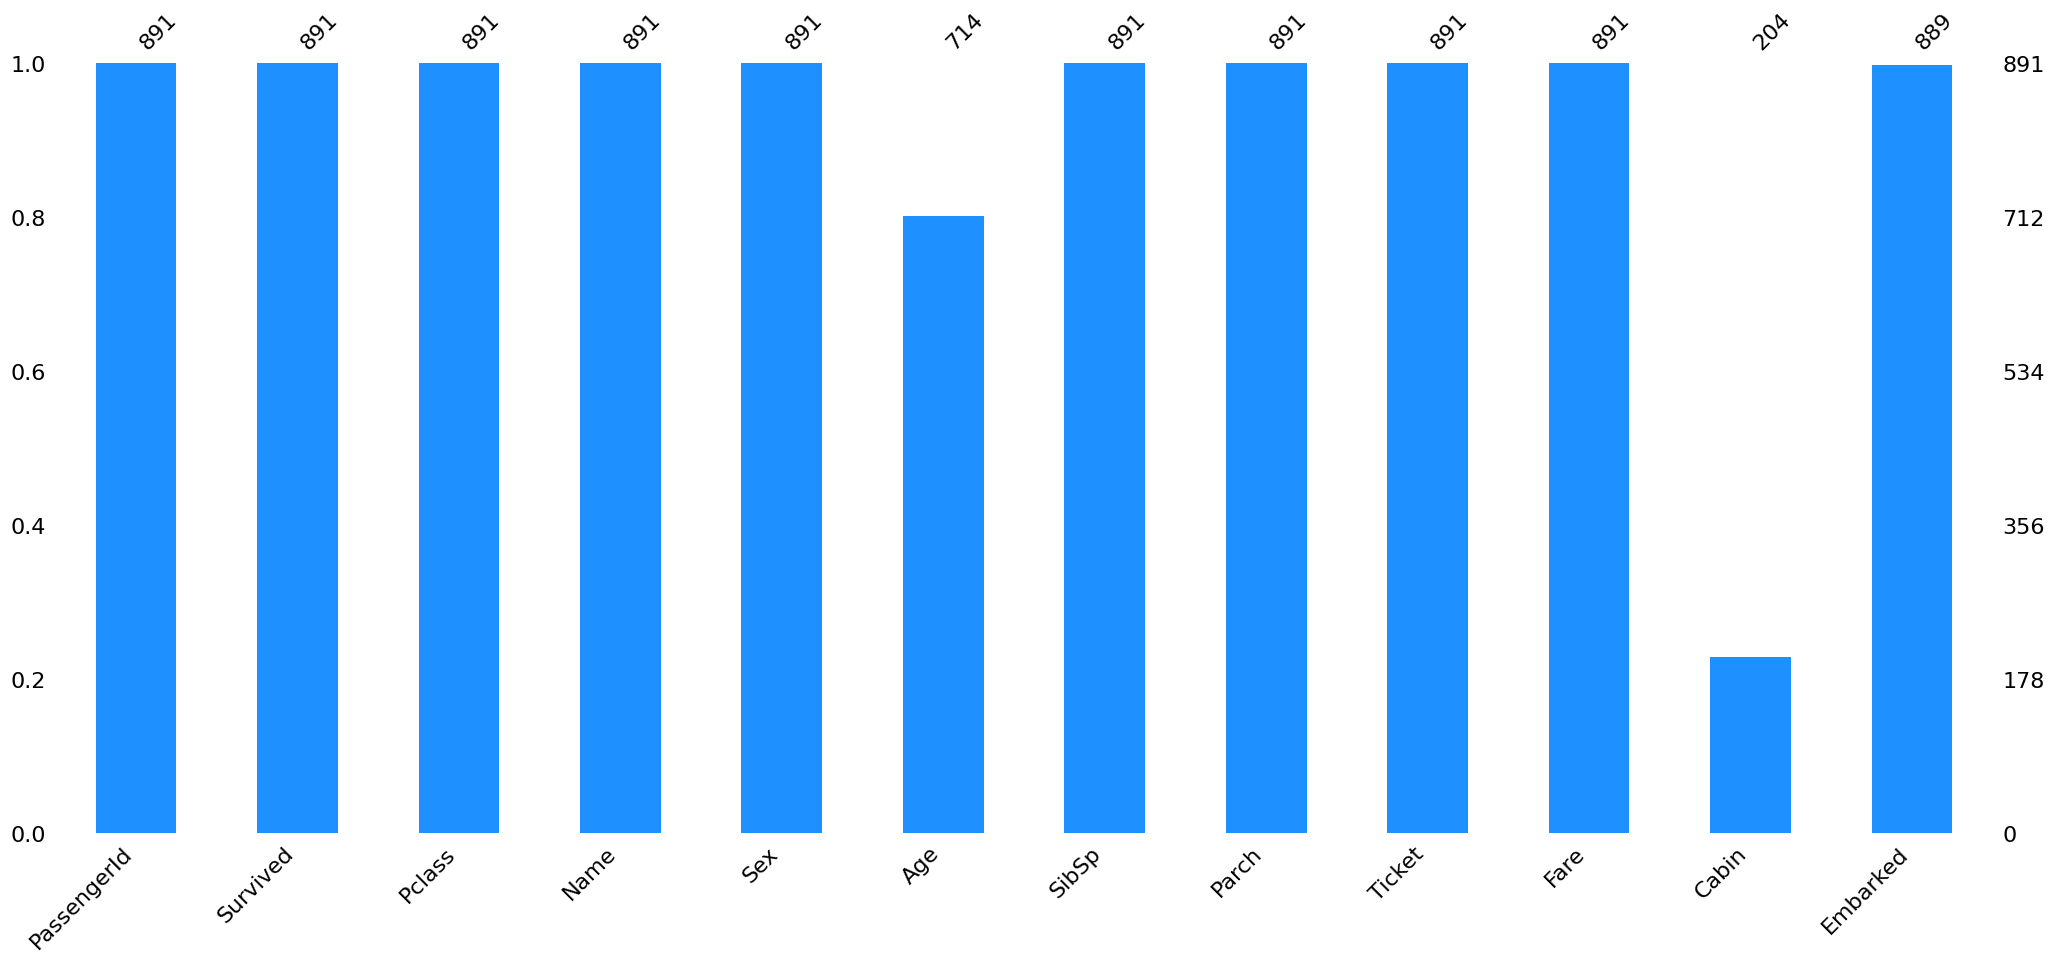

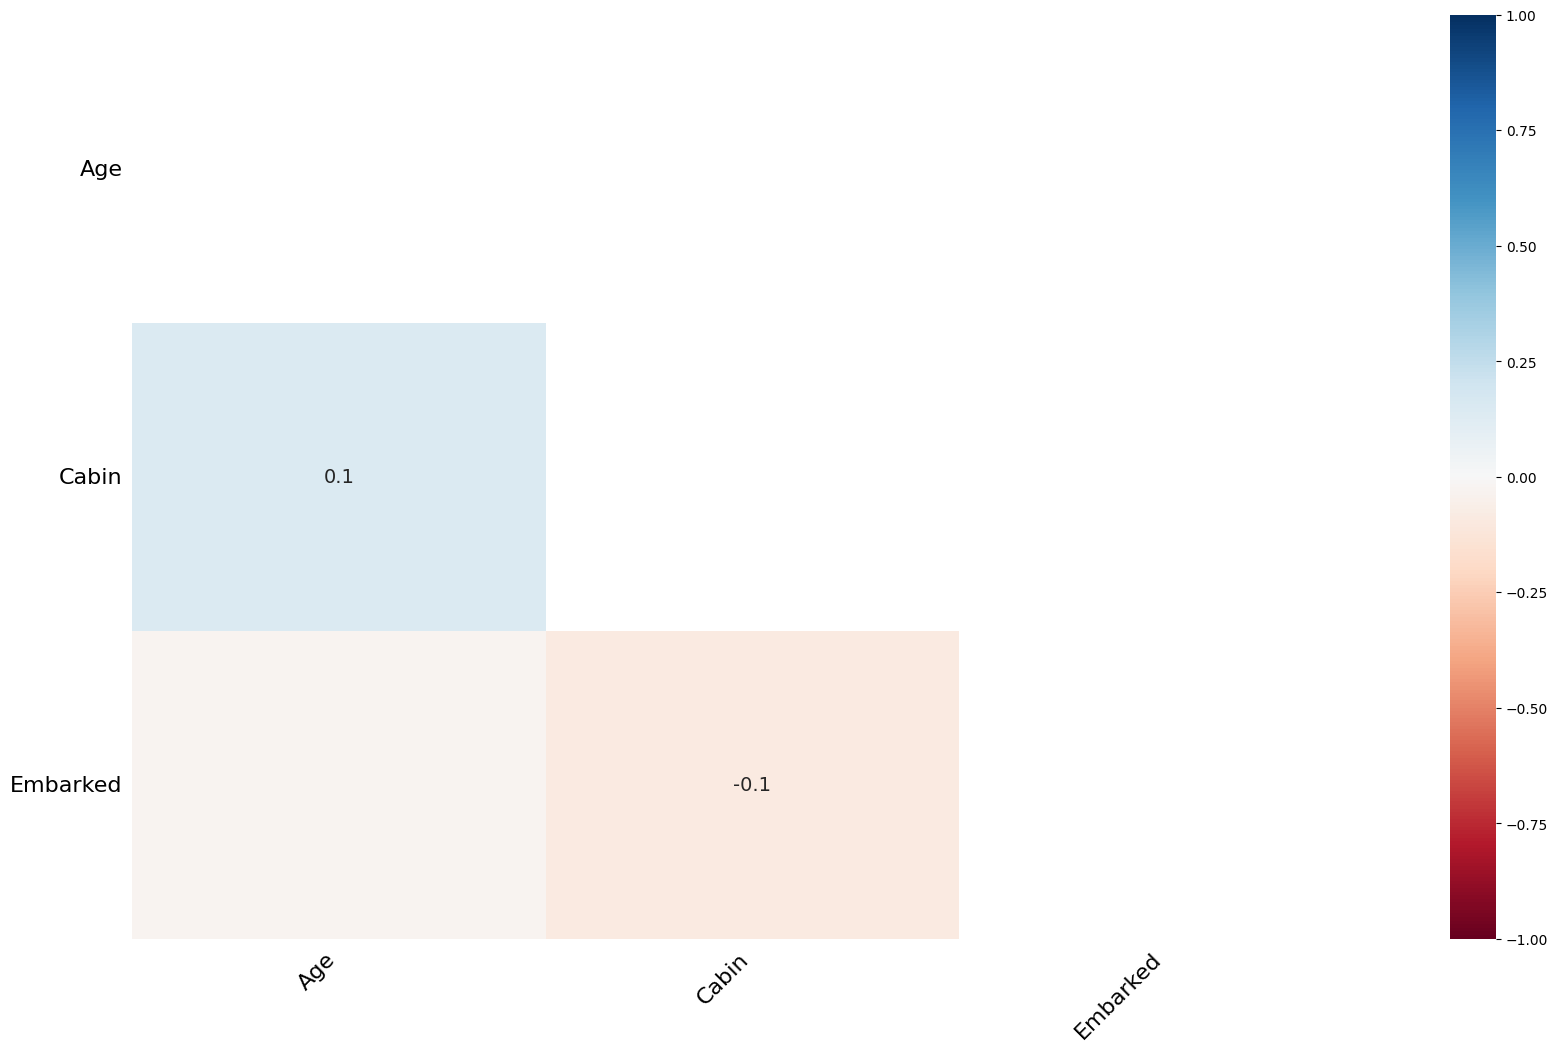

In [31]:
# Bar chart for quick volume comparison
msno.bar(df, color="dodgerblue")
plt.show()

# Heatmap for correlation analysis
# A value near 1 implies that if 'Variable A' is missing, 'Variable B' is likely missing too.
msno.heatmap(df)
plt.show()

### 3. Dendrogram
The dendrogram groups variables that have similar missingness patterns using hierarchical clustering. 
Variables that are linked together at a low height are highly correlated in their missingness.

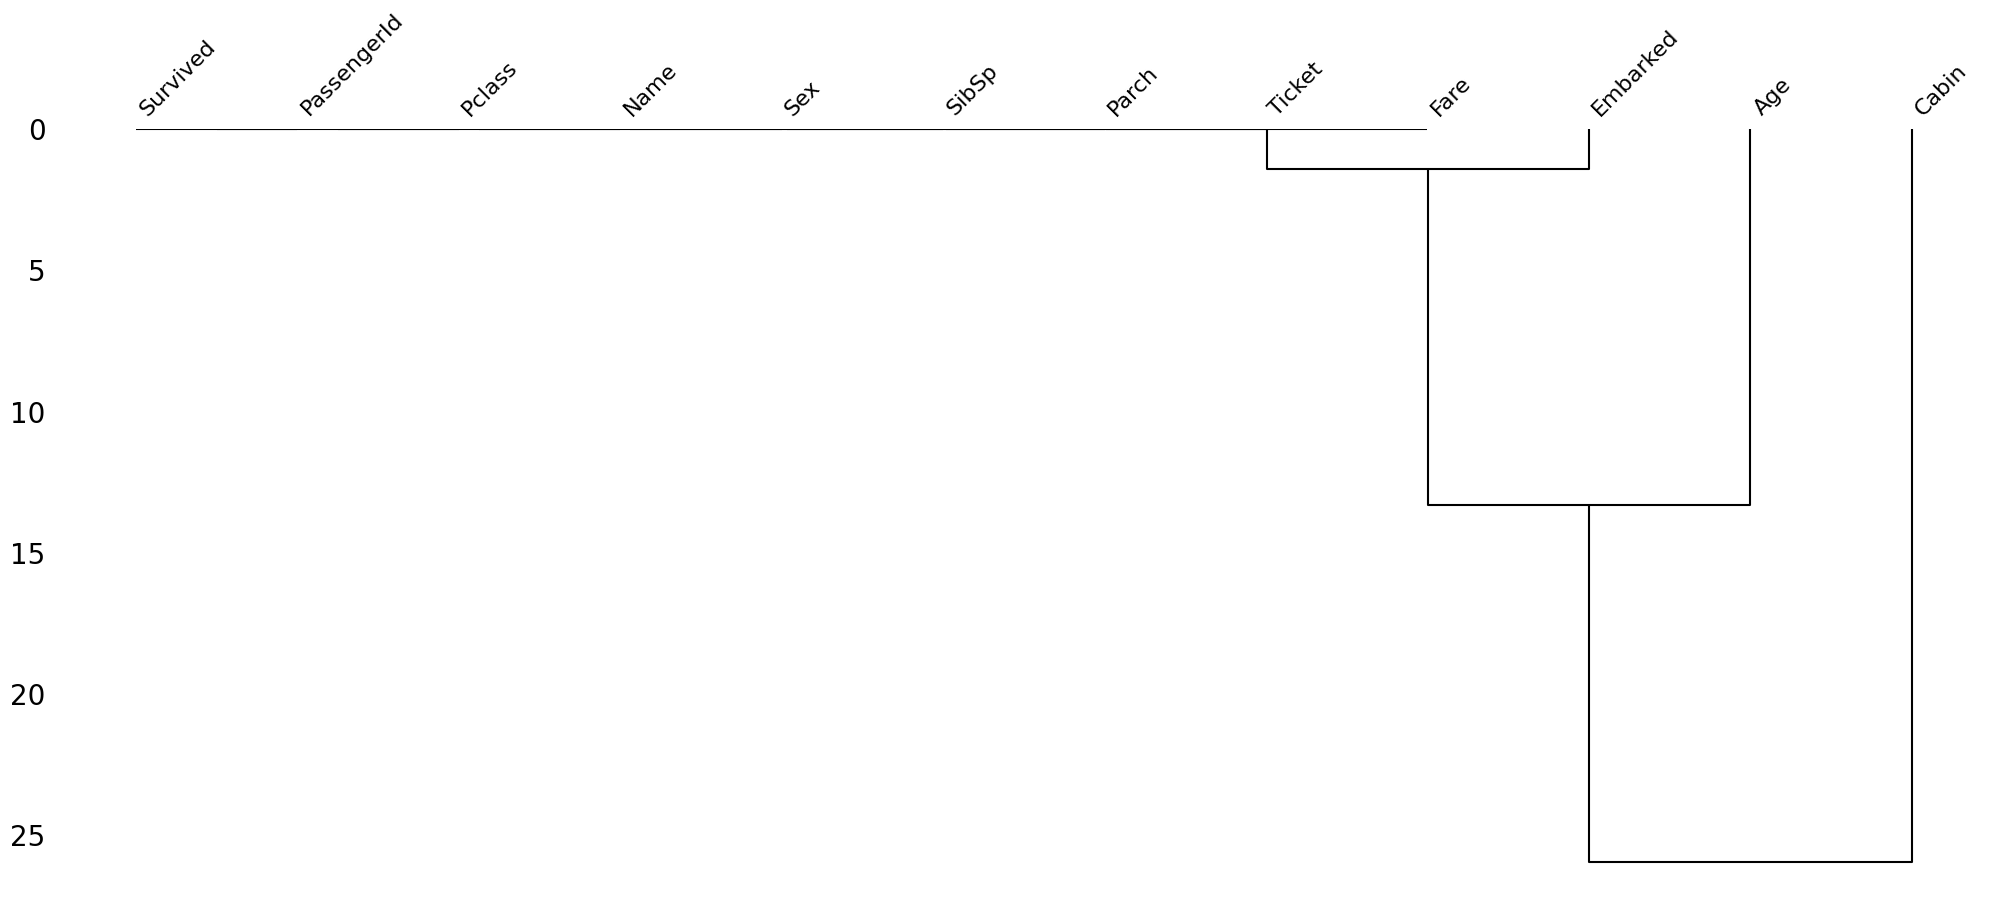

In [32]:
msno.dendrogram(df)
plt.show()

### Exporting the Visuals
Since missingno is based on Matplotlib, we save the results as high-resolution images in the 'Output' folder for our final report.

✅ Success: Analysis saved to ./Output\Missingno_report.png


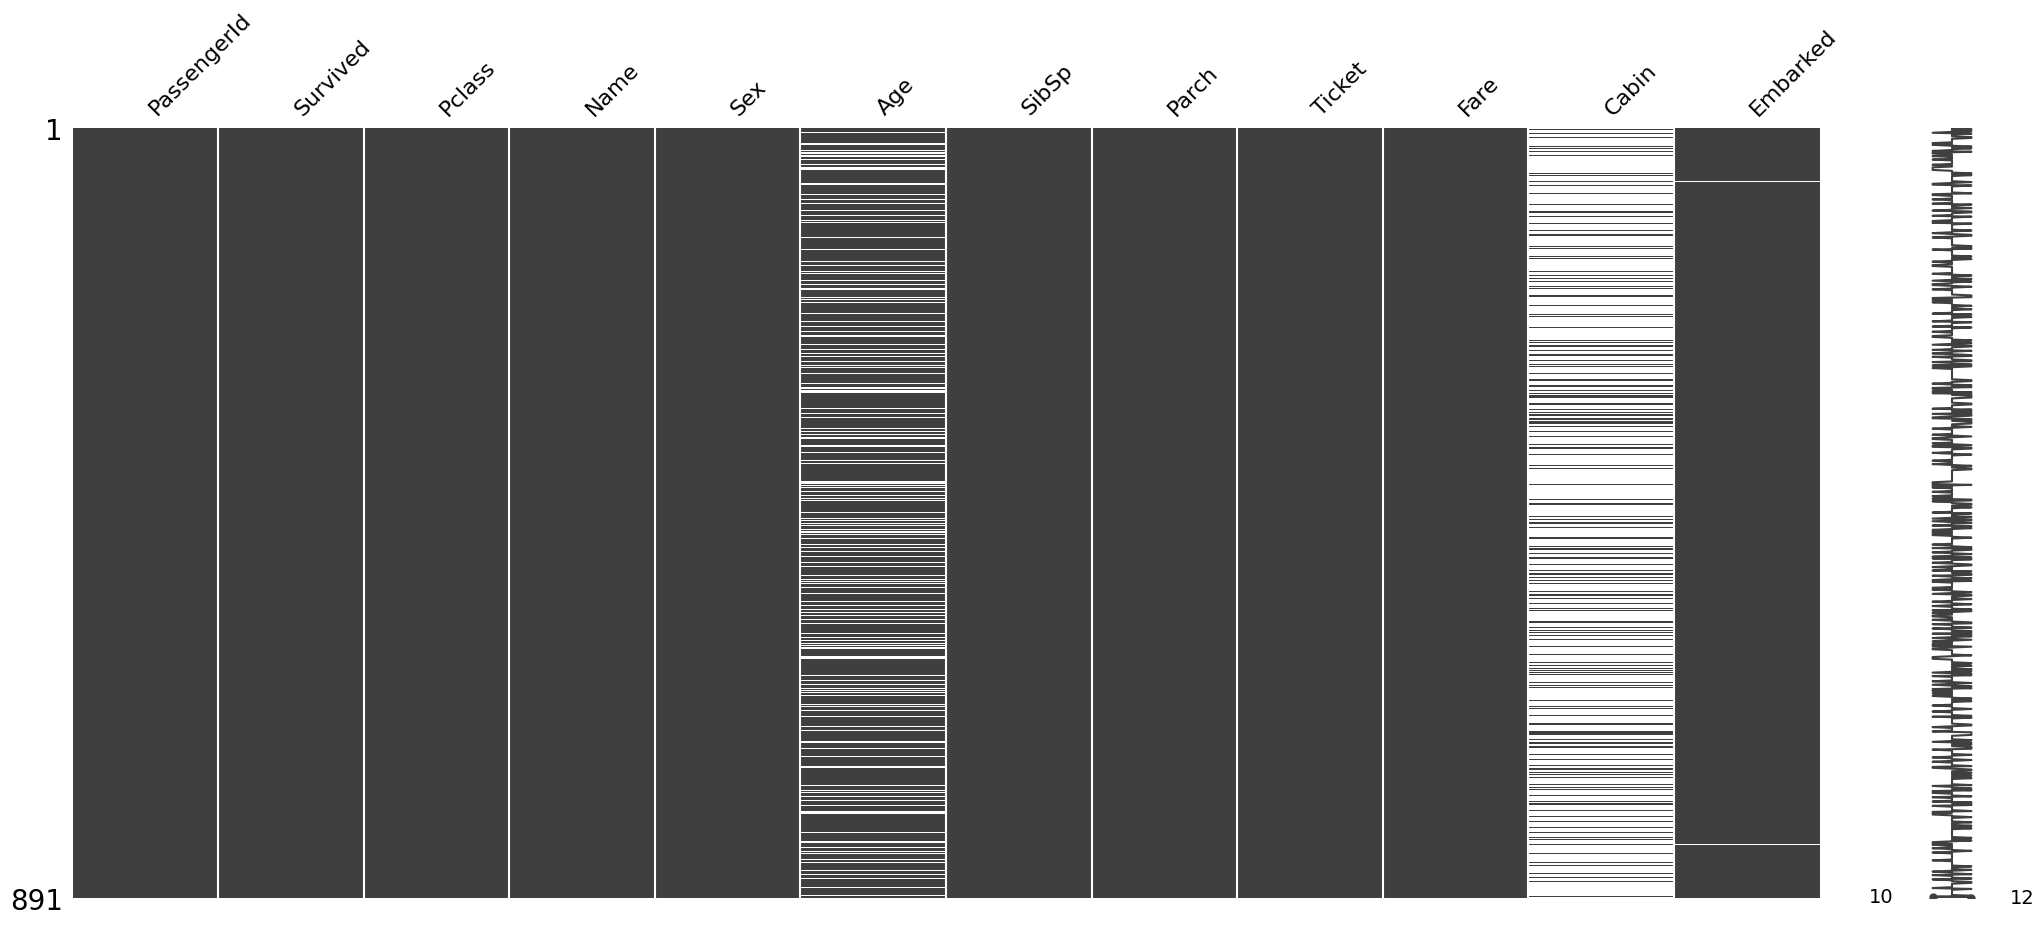

In [36]:
# Ensure output directory exists
output_dir = './Output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the matrix plot as a professional PNG
fig = msno.matrix(df).get_figure()
save_path = os.path.join(output_dir, "Missingno_report.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

print(f"✅ Success: Analysis saved to {save_path}")